In [65]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [67]:
fr = pd.read_csv("airlines.csv")

In [69]:
fr.head (5)

,airline,avail_seat_km_per_week,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,In top 100-2015?,Rank
0,Aeroflot*,1197672318,6,1,88,Yes,46
1,Air France,3004002661,6,2,337,Yes,15
2,Air India*,869253552,4,1,158,No,101
3,Air New Zealand*,710174817,5,1,7,Yes,17
4,Alaska Airlines*,965346773,5,1,88,Yes,65


In [71]:
fr.tail(5)

,airline,avail_seat_km_per_week,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,In top 100-2015?,Rank
19,TAM,1509195646,7,2,188,Yes,51
20,Thai Airways,1702802250,2,1,1,Yes,19
21,Turkish Airlines,1946098294,8,2,84,Yes,4
22,United / Continental*,7139291291,14,2,109,Yes,60
23,US Airways / America West*,2455687887,11,2,23,No,101


In [73]:
fr.dtypes

airline                   object
avail_seat_km_per_week     int64
incidents_00_14            int64
fatal_accidents_00_14      int64
fatalities_00_14           int64
In top 100-2015?          object
Rank                       int64
dtype: object

In [75]:
fr = fr.drop(['fatalities_00_14'], axis=1)
fr.head(5)

,airline,avail_seat_km_per_week,incidents_00_14,fatal_accidents_00_14,In top 100-2015?,Rank
0,Aeroflot*,1197672318,6,1,Yes,46
1,Air France,3004002661,6,2,Yes,15
2,Air India*,869253552,4,1,No,101
3,Air New Zealand*,710174817,5,1,Yes,17
4,Alaska Airlines*,965346773,5,1,Yes,65


In [77]:
fr = fr.rename (columns={ "airline": "AIRLINE", "avail_seat_km_per_week": "Avail Seat KM/week", "incidents_00_14": "Incidents 00-14","fatal_accidents_00_14" : "Fatal Accidents 00-14", })

fr.head (5)


,AIRLINE,Avail Seat KM/week,Incidents 00-14,Fatal Accidents 00-14,In top 100-2015?,Rank
0,Aeroflot*,1197672318,6,1,Yes,46
1,Air France,3004002661,6,2,Yes,15
2,Air India*,869253552,4,1,No,101
3,Air New Zealand*,710174817,5,1,Yes,17
4,Alaska Airlines*,965346773,5,1,Yes,65


In [79]:
fr.shape 
duplicate_rows_fr = fr[fr.duplicated()]
print("number of duplicate rows: ", duplicate_rows_fr.shape)

fr.count()
fr = fr.drop_duplicates()
fr.head(5)
fr.count()


number of duplicate rows:  (0, 6)


AIRLINE                  24
Avail Seat KM/week       24
Incidents 00-14          24
Fatal Accidents 00-14    24
In top 100-2015?         24
Rank                     24
dtype: int64

In [83]:
print(fr.isnull().sum())

AIRLINE                  0
Avail Seat KM/week       0
Incidents 00-14          0
Fatal Accidents 00-14    0
In top 100-2015?         0
Rank                     0
dtype: int64


In [85]:
fr.count()

AIRLINE                  24
Avail Seat KM/week       24
Incidents 00-14          24
Fatal Accidents 00-14    24
In top 100-2015?         24
Rank                     24
dtype: int64

In [87]:

print(fr.isna().sum())

AIRLINE                  0
Avail Seat KM/week       0
Incidents 00-14          0
Fatal Accidents 00-14    0
In top 100-2015?         0
Rank                     0
dtype: int64


In [89]:
fr = fr.dropna()
fr.count()

AIRLINE                  24
Avail Seat KM/week       24
Incidents 00-14          24
Fatal Accidents 00-14    24
In top 100-2015?         24
Rank                     24
dtype: int64

(21, 6)


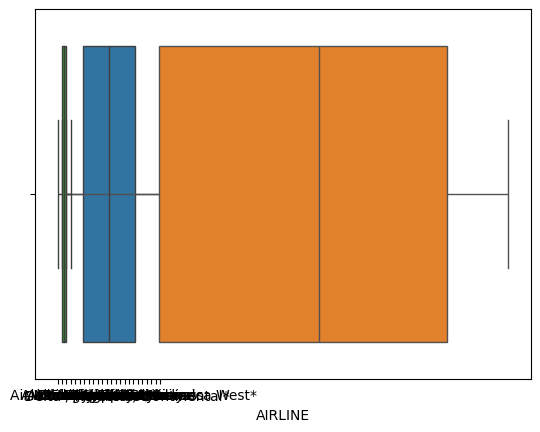

In [117]:
import seaborn as sns

# Boxplot untuk deteksi outlier
sns.boxplot(x=fr['AIRLINE'])
sns.boxplot(x=fr['Rank'])
sns.boxplot(x=fr['Fatal Accidents 00-14'])

# Pilih hanya kolom numerik
fr_numeric = fr.select_dtypes(include=['number'])

# Hitung Q1, Q3, dan IQR
Q1 = fr_numeric.quantile(0.25)
Q3 = fr_numeric.quantile(0.75)
IQR = Q3 - Q1

# Buang outlier hanya pada kolom numerik
fr_numeric_cleaned = fr_numeric[~((fr_numeric < (Q1 - 1.5 * IQR)) |
                                  (fr_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

# Gabungkan kembali dengan kolom non-numerik
fr_cleaned = fr.loc[fr_numeric_cleaned.index]

# Cek ukuran DataFrame setelah menghapus outlier
print(fr_cleaned.shape)


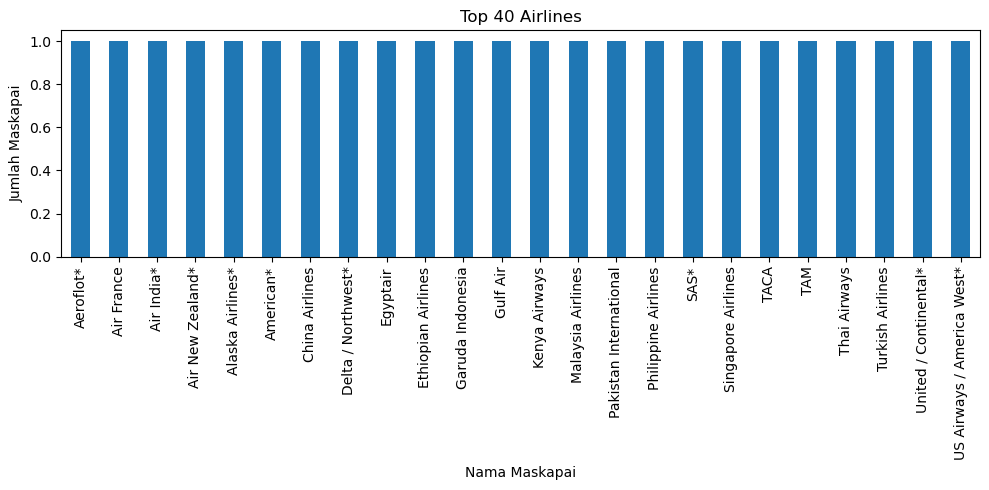

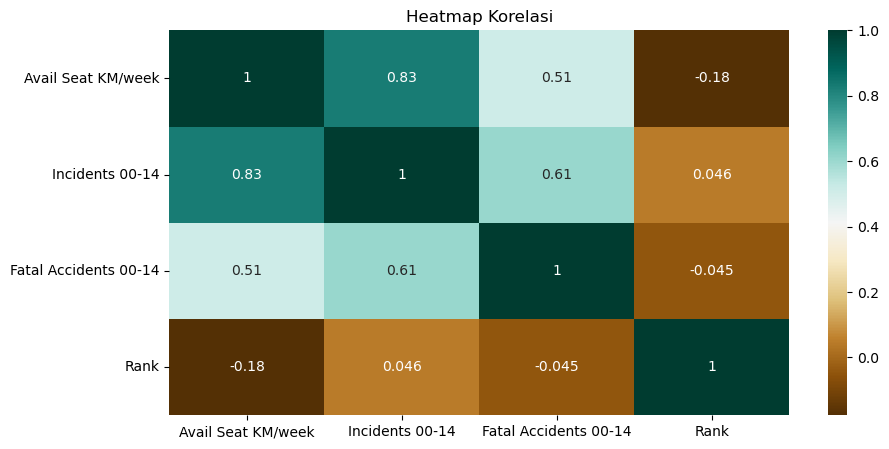

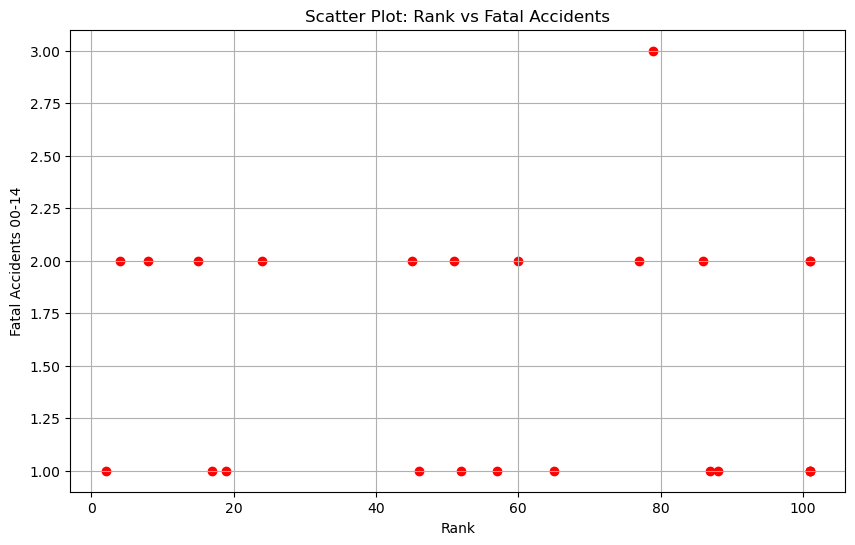

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot batang 40 maskapai teratas berdasarkan jumlah kemunculan (kalau ingin tetap menyimpan ini)
fr['AIRLINE'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Top 40 Airlines")
plt.ylabel('Jumlah Maskapai')
plt.xlabel('Nama Maskapai')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Korelasi antar kolom numerik
fr_numeric = fr.select_dtypes(include=['number'])
c = fr_numeric.corr()

# Heatmap korelasi
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="BrBG", annot=True)
plt.title("Heatmap Korelasi")
plt.show()

# Scatter plot: Rank vs Fatal Accidents
plt.figure(figsize=(10, 6))
plt.scatter(fr['Rank'], fr['Fatal Accidents 00-14'], color='red')
plt.xlabel('Rank')
plt.ylabel('Fatal Accidents 00-14')
plt.title('Scatter Plot: Rank vs Fatal Accidents')
plt.grid(True)
plt.show()
